<a href="https://colab.research.google.com/github/Apricold/Walmart_Analysis_Dataset/blob/main/walmart_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Exploration

In [4]:
#importing libraries to treat data
import pandas as pd
import numpy as np
#importing libraries to plot data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from fitter import Fitter
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Importing the dataset and reading dates properly
df=pd.read_csv('Walmart.csv', index_col=['Date'], parse_dates=['Date'])
df.head()

<ipython-input-5-003bc6a36ded>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('Walmart.csv', index_col=['Date'], parse_dates=['Date'])


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106


Explication of the variables

*   Store:The store number
*   Date:The week of sales





In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-05-02 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [7]:
#We check if theres any nan values in the dataframe
df.isna().values.any()

False

We can see that our dataset have 6435 entries also there are not nan values 


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [9]:
#CHECKING UNIQUE VALUES IN EACH COLUMN
df.nunique().sort_values()

Holiday_Flag       2
Store             45
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

#*Explority Data Analysis* (EDA)#

#plotting week sales over time

(array([14610., 14730., 14853., 14975., 15095., 15218., 15340., 15461.,
        15584., 15706.]),
 [Text(14610.0, 0, '2010-01'),
  Text(14730.0, 0, '2010-05'),
  Text(14853.0, 0, '2010-09'),
  Text(14975.0, 0, '2011-01'),
  Text(15095.0, 0, '2011-05'),
  Text(15218.0, 0, '2011-09'),
  Text(15340.0, 0, '2012-01'),
  Text(15461.0, 0, '2012-05'),
  Text(15584.0, 0, '2012-09'),
  Text(15706.0, 0, '2013-01')])

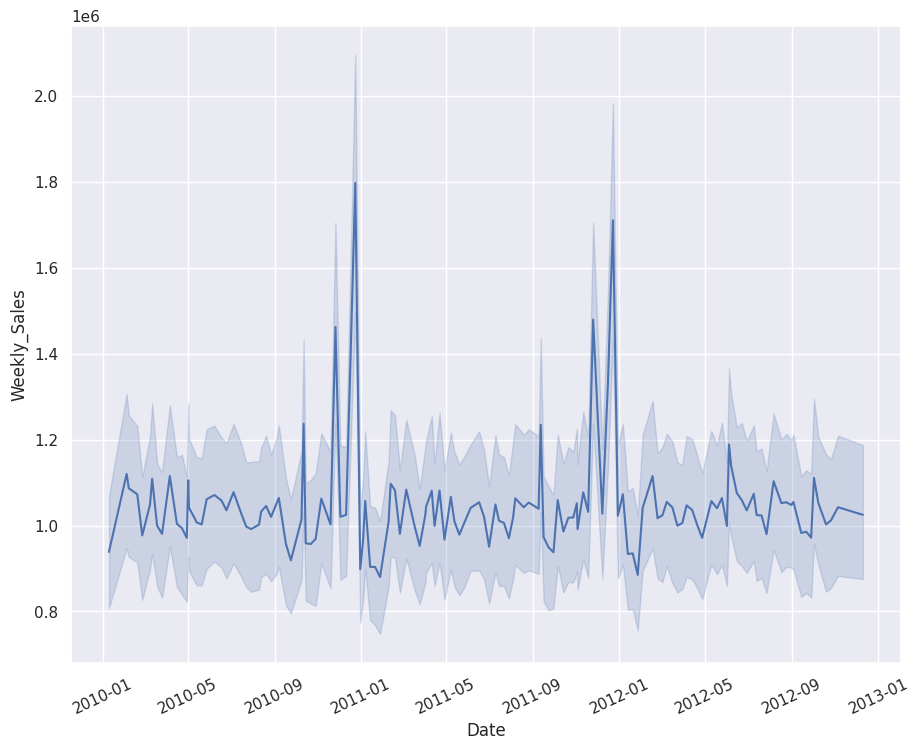

In [10]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(x = "Date", y = "Weekly_Sales",
             data = df)
plt.xticks(rotation = 25)

*we can definitely identify there are two peaks over two years in the whole dataset after Sepctember(09) until january(01) there's a huge increment in sales,lets identify which months sales are the highest*

<ipython-input-11-84fbe842eb69>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Weekly_Sales, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


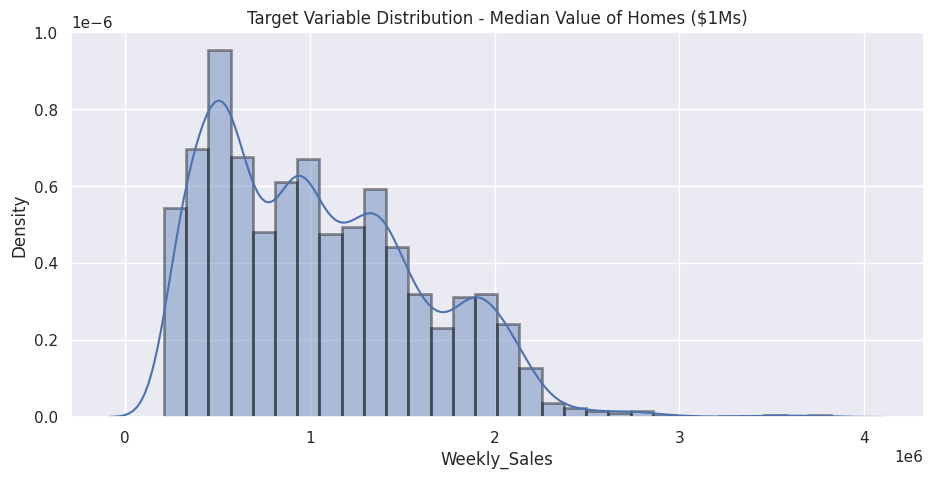

In [11]:
plt.figure(figsize=[11,5])
sns.distplot(df.Weekly_Sales, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

*let's find the distribution of our target variable using fitter module the summary method provides a list of the best performing models ascendingly with respect to the  sum of squares error*

Fitting 5 distributions: 100%|██████████| 5/5 [00:00<00:00,  6.04it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.060105e-12,3304.974362,-233826.723767,inf,0.035035,2.682577e-07
gamma,1.366281e-12,3206.657881,-232202.775467,inf,0.056468,2.820510e-18
norm,2.614065e-12,3471.056853,-228036.426203,inf,0.082358,2.038638e-38
uniform,8.366655e-12,3023.771642,-220550.284781,inf,0.442106,0.000000e+00
lognorm,1.479443e-11,3634.729145,-216873.588482,inf,0.777526,0.000000e+00


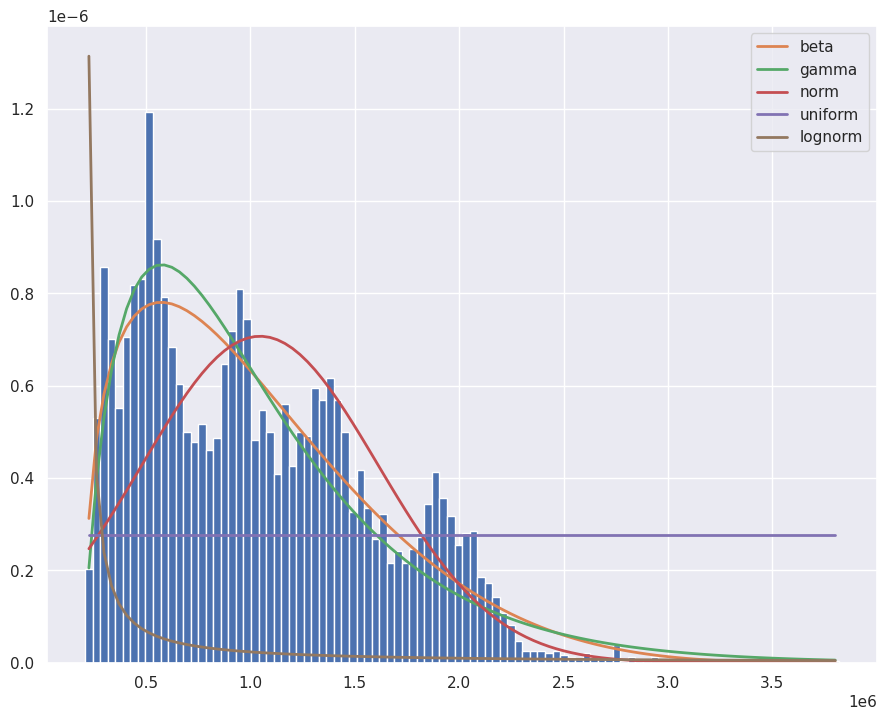

In [16]:
dist_fitter = Fitter(df.Weekly_Sales,
                     distributions = ["uniform",
                                      "beta",
                                      "gamma",
                                      "lognorm",
                                      "norm",])

dist_fitter.fit()
dist_fitter.summary()      

*let's find now the parameters in this case the mean and the variance with which beta distribution fits our data*

In [17]:
mean,var,kuw,ske=dist_fitter.fitted_param["beta"]
print(f'the mean of the Weekly sales probability distribution is: {mean}\n the var of the Weekly sales probabily distribution is: {var} ')

the mean of the Weekly sales probability distribution is: 1.440413205448582
 the var of the Weekly sales probabily distribution is: 5.257967904441347 
